# Лабораторная работа №3: Регрессионный анализ
Выполнила студентка гр. 1375 Васильева Софья. Вариант №7

## Цель работы
Ознакомиться с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения

**МНК (Метод Наименьших Квадратов)**
$RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\|=(Y-X^{\intercal}\beta)^{\intercal}\cdot(Y-X^{\intercal}\beta)\to min\beta$\
\
Нормальные уравнения: $XX^{\intercal}\beta=XY$\
Решение системы нормальных уравнений в регулярном случае: $\widehat{\beta}=(XX^{\intercal})^{-1}XY$\
\
$RSS(\beta)=\sum_{i=1}^{n}\left( Y_{i}-\sum_{j=1}^{m}x_{ji}\beta_{j} \right)^{2}$\
$\frac{\partial RSS}{\partial \beta_{k}} = -2\sum_{i=1}^{n}x_{ki}\left(Y_{i}- \sum_{j=1}^{m}x_{ji}\beta_{j}\right)=0, k=1...m$

**Доверительный интервал**

ДНО - функция: $\psi(\beta) = C^\intercal\beta$

МНК оценка: $\hat{\psi}= C^\intercal\hat{\beta}$

$b_\psi = C^\intercal(XX^\intercal)^{-1}C$

Распределение: $\hat{\psi} \sim \mathcal{N}(\psi,\sigma^2b_\psi) $

Тогда $\frac{\hat{\psi} - {\psi}}{S\sqrt{b_\psi}} \sim S_{n-r}$

Доверительный интервал: $\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$, где $x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$

 **Доверительный эллипсоид**

$b_\psi = C^\intercal(XX^\intercal)^{-1}C$

Распределение: $\frac{\left(\hat{\psi} - {\psi}\right)^\intercal {b_\psi}^{-1} \left(\hat{\psi} - {\psi}\right)}{qS^2} \sim \mathcal{F}_{q,n-r}$

Доверительный эллипсоид: $\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$,где $x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$

**Несмещённая оценка дисперсии $(S^{2})$**

$S^{2} = \frac{SS_{e}}{n-r} = \frac{RSS(\widehat{\beta})}{n-r}$

$SS_{e}=RSS(\widehat{\beta})$

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной $Y$ от переменной $X$. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1.Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y по переменной X. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$.  Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки

Линейная регрессионная модель:

$\mathbb{E}_{\theta}(Y|z) = x(z)^{\intercal}\beta$



Альтернативная форма записи :

$ Y = X^T \beta + e  \quad \mathbb{E}_\theta +\varepsilon = 0 \quad Var_\theta e = \sigma^2 E$

Система нормальных уравнений:

$ X X^T \beta = X Y $

Решение системы нормальных уравнений в регулярном случае:

$ \hat{\beta} = (X X^T)^{-1} XY $

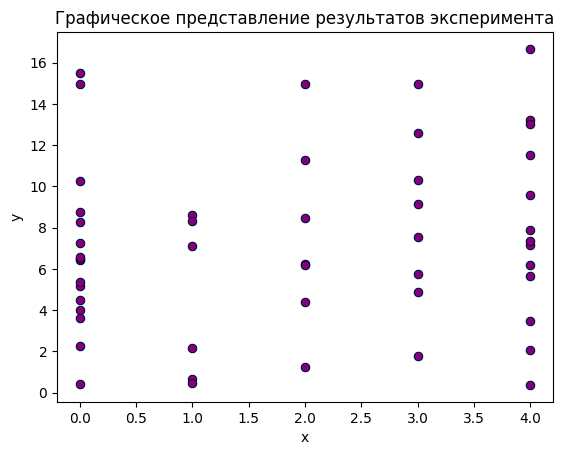

In [664]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statistics as st
import scipy.stats as sc
from scipy.stats import chi2
import scipy.stats as sps
import scipy.optimize as spo

y = np.array( [4.03, 8.77, 6.21, 7.15, 2.27, 2.15, 15.47,9.59, 14.94, 2.08, 5.19,14.96, 3.48, 1.80, 4.40, 
14.98, 0.65, 7.57, 6.23, 6.20, 7.88, 10.26, 7.33, 13.21, 4.49, 8.63, 11.26, 11.50, 6.41, 4.86, 6.46, 0.42, 8.48,
 8.33, 0.38, 5.64, 16.66, 13.00, 5.38, 5.76, 7.10, 0.48, 10.29, 8.28, 9.15, 6.57, 7.25, 12.58, 3.61, 1.25])

x = np.array( [0, 0, 4, 4, 0, 1, 0, 4, 0, 4, 0, 3, 4, 3, 2, 2, 1, 3, 2, 2, 4, 0, 4, 4, 0,
 1, 2, 4, 0, 3, 0, 0, 2, 1, 4, 4, 4, 4, 0, 3, 1, 1, 3, 0, 3, 0, 0, 3, 0, 2])
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Графическое представление результатов эксперимента")
plt.scatter(x, y, color='purple', edgecolors='black', linewidths=0.5)
plt.show()

In [665]:
Y_matrix = np.matrix(y).T
X_matrix = np.matrix([[1] * len(x), x])

Beta_matrix = np.linalg.inv(X_matrix * X_matrix.T) * X_matrix * Y_matrix
beta_0 = float(Beta_matrix[0, 0])
beta_1 = float(Beta_matrix[1, 0])
XX_T_inv = np.linalg.inv(X_matrix * X_matrix.T)
print("b0:", round(beta_0, 3) )
print("b1:", round(beta_1, 3))
print("(XXT)^-1",XX_T_inv)

b0: 6.375
b1: 0.441
(XXT)^-1 [[ 0.0484269  -0.01480568]
 [-0.01480568  0.00771129]]


МНК-оценки параметров
$ \hat{\beta} = \left( \begin{array}{c} \hat\beta_0 \\ \hat\beta_1 \end{array} \right) = \left( \begin{array}{c} 6.375 \\ 0.441 \end{array} \right) $

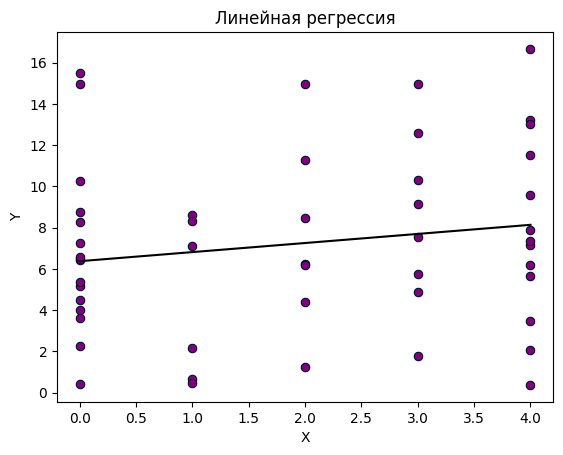

In [666]:
b = np.array([beta_0, beta_1])
plt.scatter(x, y)
plt.plot([min(x), max(x)], [beta_0 + beta_1 * min(x), beta_0 + beta_1 * max(x)], color='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Линейная регрессия")
plt.scatter(x, y, color='purple', edgecolors='black', linewidths=0.5)
plt.show()

### 2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом $h = 2.20 $. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha = 0.05$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Несмещённая оценка дисперсии:

$ \displaystyle S^2 = \frac{RSS( \hat{\beta} )}{ n - r } = \frac{(Y - X^T \hat{\beta})^T (Y - X^T \hat{\beta})}{48} \approx 18.325$



In [667]:
var = np.linalg.norm((Y_matrix - X_matrix.T * Beta_matrix).T*(Y_matrix - X_matrix.T * Beta_matrix)) /(len(x) - np.linalg.matrix_rank(X_matrix))
print("ранг матрицы =",np.linalg.matrix_rank(X_matrix))
print("Несмещённая оценка дисперсии =", var)

ранг матрицы = 2
Несмещённая оценка дисперсии = 18.324687324568167


-7.756761258482418
9.095471930906845


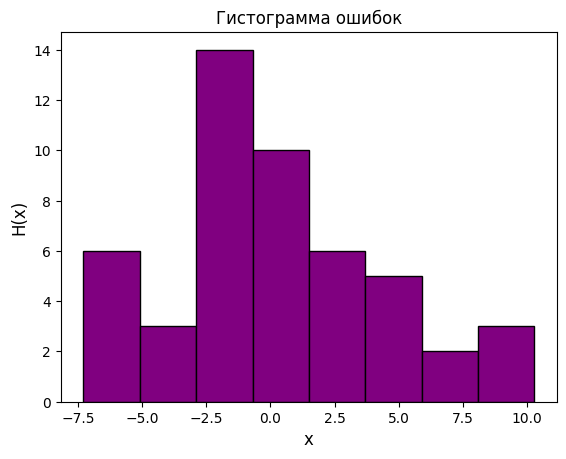

In [668]:
mistakes = Y_matrix - X_matrix.T * Beta_matrix
mean_mistakes = 0
std_mistakes = np.sqrt(var)
mistakes = Y_matrix - X_matrix.T * Beta_matrix
min_mistake_scalar = float(np.min(mistakes))
max_mistake_scalar = float(np.max(mistakes))
h = 2.2 
plt.title("Гистограмма ошибок")
plt.xlabel('x', fontsize=12)
plt.ylabel('H(x)', fontsize=12)
min_mistake_scalar = float(np.min(mistakes))
max_mistake_scalar = float(np.max(mistakes))

print(min_mistake_scalar)

print(max_mistake_scalar)


counts, bins = np.histogram(mistakes, bins=[i / 100 for i in range((int(min_mistake_scalar)*100)-30, (int(max_mistake_scalar)*100)+300, int(h*100))])
plt.hist(bins[:-1], edgecolor='black', weights=counts, bins=bins, color='purple')
plt.show()

**Оценю соответсвует ли распределение ошибок нормальному распределению**

При $ a_0 = 0 $ ; $ \ S^2  = 18.325$; $ \alpha_1 = 0.05 $

$I_{1}=\left(-\infty, -5.55 \right], n_{1}=6$  $\quad\quad\quad\quad\quad\quad\quad\quad\quad$ $I_{5}=\left(1.05, 3.25\right], n_{5}=6$

$P_{1}=0.097$  $\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$ $P_{5}=0.18$  

$I_{2}=\left(-5.55, -3.35 \right], n_{2}=3$ $\quad\quad\quad\quad\quad\quad\quad\quad$ $I_{6}=\left(3.25, 5.45\right], n_{6}=5$  

$P_{2}=0.12$   $\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$ $P_{6}=0.12$  

$I_{3}=\left(-3.35,-1.15 \right], n_{3}=14$  $\quad\quad\quad\quad\quad\quad\quad\quad$ $I_{7}=\left(5.45, 7.65\right], n_{7}=2$  

$P_{3}=0.17$  $\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$ $P_{7}=0.06$  

$I_{4}=\left(-1.15,1.05 \right], n_{4}=10$  $\quad\quad\quad\quad\quad\quad\quad\quad$ $I_{8}=\left(7.65, +\infty\right], n_{8}=3$ 

$P_{4}=0.2$  $\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$  $P_{8}=0.04$  


 **Вычисление статистики критерия $\chi^2$:**

   $\chi^2 = \sum \limits_{i=1}^7 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 7.1$

   **Сравнение с критическим значением:**
   - Из таблицы для распределения $\chi^2$ с 7 степенями свободы при уровне значимости $\alpha = 0.05$ значение критерия составляет $\chi_{7, 0.95}^2 \approx 15.51$.
   - Так как $\chi_{7, 0.95}^2 > \chi^2 $, то нет оснований отвергнуть гипотезу.

   Наибольшее значение уровня значимости равняется $0.419$




In [669]:

from re import match
from math import inf

I = [(-inf, -5.55), (-5.55,-3.35), (-3.35,-1.15), (-1.15, 1.05),(1.05, 3.25),(3.25, 5.45),(5.45,7.65),(7.65,+inf)]
a0=0
sigma0= 18.325
n=len(y)
alpha = 0.05
n_i = [6,3,14,10,6,5,2,3];p_i = [];np_i = [];n_i_np_i = [];res = []
for i in I:
 p_i.append(round(sc.norm.cdf(i[1], loc=a0,scale=std_mistakes) - sc.norm.cdf(i[0], loc=a0,scale=std_mistakes), 8))
print(p_i)
for i in range (8):
 np_i.append(round(n*p_i[i],8))
print(np_i)
for i in range(8):
 n_i_np_i.append(round(n_i[i] - np_i[i], 8))
for i in range(8):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 8))
print(res, sum(res))
chi2_val_5_09 = chi2.ppf(1-alpha, 8)
print('chi2_val',chi2_val_5_09)
chi2 = 7.1
print("Наибольшее значение уровня значимости =", round(1 - sps.chi2.cdf(chi2, 7), 3))

[0.09740052, 0.11953755, 0.17716318, 0.20278087, 0.17925605, 0.12237871, 0.06452056, 0.03696256]
[4.870026, 5.9768775, 8.858159, 10.1390435, 8.9628025, 6.1189355, 3.226028, 1.848128]
[0.26218366, 1.48268049, 2.98465278, 0.0019068, 0.97940333, 0.20461347, 0.46594284, 0.71792057] 7.09930394
chi2_val 15.507313055865453
Наибольшее значение уровня значимости = 0.419


In [670]:
Dn =sps.kstest([element[0,0] for element in mistakes], "norm", args = (mean_mistakes,std_mistakes)).statistic
print("Статистика критерия Колмогорова Dn:", Dn)
x_a = sps.ksone.ppf(0.95, 50)
print("x_alpha",x_a)


print("Наибольшее значение уровня значимости =", 1 - sps.ksone.cdf(Dn, 50))

Статистика критерия Колмогорова Dn: 0.07346711580350374
x_alpha 0.16959440647022855
Наибольшее значение уровня значимости = 0.5560267223825145


Критерий Колмогорова\
$\widehat{\varphi(\vec{X})} = \begin{cases} 0, \quad \widehat{D_n} \leq 0.17 \\ 1, \quad \widehat{D_n} > 0.17 \end{cases}$


Т.к. $\widehat{D_n} < x_\alpha$, гипотеза  принимается.

   Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется $0.540$


C:\Users\User\AppData\Local\Temp\ipykernel_3436\894016379.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mistakes_range = np.arange(min(mistakes), max(mistakes) + 1, 0.05)


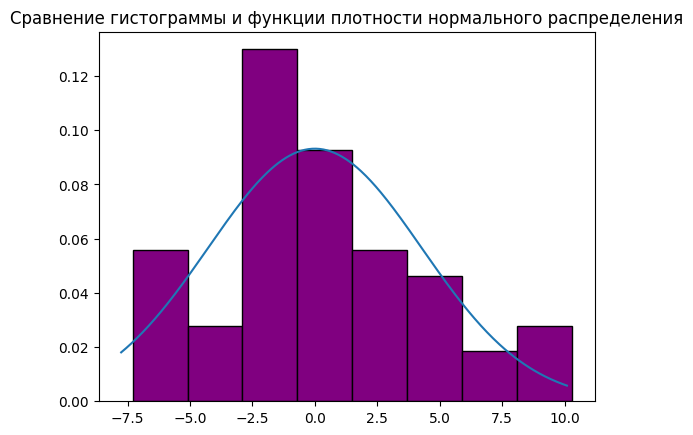

In [671]:
mistakes = Y_matrix - X_matrix.T * Beta_matrix
fig, ax = plt.subplots()
counts, bins = np.histogram(mistakes, bins=[i / 100 for i in range((int(min_mistake_scalar)*100)-30, (int(max_mistake_scalar)*100)+300, int(h*100))])
plt.hist(bins[:-1], edgecolor='black', weights=counts, bins=bins, color='purple', density= True)
mistakes_range = np.arange(min(mistakes), max(mistakes) + 1, 0.05)


plt.plot(mistakes_range, sps.norm.pdf(mistakes_range, mean_mistakes, std_mistakes))
ax.set_title("Сравнение гистограммы и функции плотности нормального распределения")
plt.show()

Анализируя получившийся график, можно сказать, что в среднем расстояние между рассматриваемыми функциями распределения достаточно мало, но визуальная оценка может быть недостаточной для однозначного заключения о нормальности данных.

### 3.В предположении нормальности ошибок построить доверительный интервал для параметров $\beta_0,\beta_1$ уровня доверия $1-\alpha$.Построить доверительный эллипс уровня доверия $1-\alpha$ для ($\beta_0,\beta_1$) (вычислить его полуоси).

ДНО функция: $\psi = C^T \beta $

Элемент дисперсии оценки: $ b_\psi = C^T (XX^T)^{-1}C$

Тогда: $ \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r} $

Доверительный интервал уровня доверия $1 - \alpha$:

$ P_\theta(-x_\alpha \le \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \le x_\alpha) = 1 -\alpha $, 


$[ \widehat \psi -x_{\alpha}s\sqrt{b} , \widehat \psi + x_{\alpha}s\sqrt{b}] \ni \psi$ 

где квантиль $ x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2} $

$x_{\alpha} = S_{n - 2}(1 - \frac{\alpha}{2}) = 2.01$


- **Вычислим $\beta_0:$** 

  $\psi_{\beta_0} = \begin{pmatrix}
    1 \\
    0
    \end{pmatrix}  ^ {\intercal} \cdot  \begin{pmatrix}
    \beta_0 \\
    \beta_1
    \end{pmatrix}$

    $b_{\psi_{\beta_0}} =  \begin{pmatrix}
    1 & 0
    \end{pmatrix} (XX^{\intercal})^{-1} \begin{pmatrix}
    1 \\ 0
    \end{pmatrix} = 0.050$

    
  
- **Вычислим $\beta_1:$**

  $\psi_{\beta_1} = \begin{pmatrix}
    0 \\
    1
    \end{pmatrix}  ^ {\intercal} \cdot  \begin{pmatrix}
    \beta_0 \\
    \beta_1
    \end{pmatrix}$
  
    $b_{\psi_{\beta_1}} =  \begin{pmatrix}
    0 & 1
    \end{pmatrix} (XX^{\intercal})^{-1} \begin{pmatrix}
    0 \\ 1
    \end{pmatrix} = 0.008$


$ \cfrac{\widehat \psi - \psi}{s\sqrt{b_{\psi_{\beta_0}}}} \sim S_{n-2} $

$ \cfrac{\widehat \psi - \psi}{s\sqrt{b_{\psi_{\beta_1}}}} \sim S_{n-2} $




In [672]:
from scipy import stats
import scipy

r = np.linalg.matrix_rank(X_matrix)
n = len(x)
alpha = 0.05
func = stats.t(n - 2)
x_alpha = func.ppf(1 - alpha/2)
print(f'x_alpha: {round(x_alpha, 4)}')
e =  np.array([1, 0]).reshape((2, 1))
e1 = np.array([1,0])
e2 = np.array([0,1])
e3 =  np.array([0, 1]).reshape((2, 1))


b1 = e1 * XX_T_inv * e
b2 = e2 *XX_T_inv*e3
print(b1)
print(b2)


left = beta_0 - x_alpha * np.sqrt(var) * np.sqrt(b1)
right = beta_0 + x_alpha * np.sqrt(var) * np.sqrt(b1)
print("Интервал для b1 (",left,right,")")

left = beta_1 - x_alpha * np.sqrt(var) * np.sqrt(b2)
right = beta_1 + x_alpha * np.sqrt(var) * np.sqrt(b2)
print("Интервал для b2 (",left,right,")")

x_alpha: 2.0106
[[0.0484269]]
[[0.00771129]]
Интервал для b1 ( [[4.48046345]] [[8.26859269]] )
Интервал для b2 ( [[-0.31525577]] [[1.19637236]] )


$\left[4.48, 8.27\right] \ni \beta_0$

$\left[-0.32, 1.20\right] \ni \beta_1$

**Построим доверительный эллипс для параметра $(\beta_0, \beta_1)$ уровня доверия 1 - $\alpha$**

$ A_\alpha = \{\overrightarrow{x}: (\overrightarrow{x} - \widehat \psi)^T B^{-1} (\overrightarrow{x} - \widehat \psi) \le qs^2x_\alpha\}$

$ A_\alpha = \{\overrightarrow{x}: (\overrightarrow{x} - \widehat \psi)^T (C^T (XX^T)^{-1}C)^{-1}(\overrightarrow{x} - \widehat \psi) \le qs^2x_\alpha\}$,

где $ x_\alpha = F_{q, n-r}(x_\alpha) = 1 - \alpha$

In [673]:
fx = 0.95
x_a = sps.f.ppf(fx, 2, 48)
print("x_a =", round(x_a, 3))

x_a = 3.191


In [674]:

 b0_val = []
b1_val = []

for b0 in np.arange(0, 10, 0.05):
    for b1 in np.arange(-2, 5, 0.05):
        x = np.array([b0, b1])
        psi = np.array([6.375, 0.441])
        X = np.array( [0, 0, 4, 4, 0, 1, 0, 4, 0, 4, 0, 3, 4, 3, 2, 2, 1, 3, 2, 2, 4, 0, 4, 4, 0,
        1, 2, 4, 0, 3, 0, 0, 2, 1, 4, 4, 4, 4, 0, 3, 1, 1, 3, 0, 3, 0, 0, 3, 0, 2])
        q = 2
        S2 = 18.325
        x_a = 3.2
        
        x_psi = x - psi
        XXT = np.dot(X, np.transpose(X))
        
        if np.dot(np.dot(np.transpose(x_psi), XXT), x_psi) <= q * S2 * x_a:
            b0_val.append(round(b0, 3))
            b1_val.append(round(b1, 3))


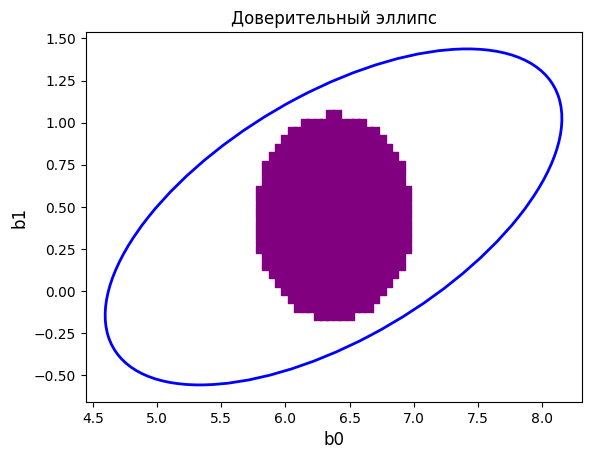

In [675]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse



b0_interval = [4.48,8.27]
b1_interval = [-0.32,1.20]


b0_mean = (b0_interval[0] + b0_interval[1]) / 2
b1_mean = (b1_interval[0] + b1_interval[1]) / 2


b0_std = (b0_interval[1] - b0_interval[0]) / 2
b1_std = (b1_interval[1] - b1_interval[0]) / 2


angle = np.degrees(np.arctan2(b1_interval[1] - b1_interval[0], b0_interval[1] - b0_interval[0]))


fig, ax = plt.subplots()


ax.scatter(b0_val, b1_val, marker=',', color='purple')


ellipse = Ellipse((b0_mean, b1_mean), width=b0_std * 2, height=b1_std * 2, angle=angle,
edgecolor='blue', fc='None', lw=2)


ax.add_patch(ellipse)


plt.title('Доверительный эллипс')
plt.xlabel('b0', fontsize=12)
plt.ylabel('b1', fontsize=12)

plt.show()

**Вычислю полуоси эллипса**

$C = \begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix} $

Пусть $ \begin{pmatrix}
x\\
y
\end{pmatrix} = P(\widehat \psi - \psi)$, где P - матрица собственных векторов.

Тогда уравнение доверительного эллипсоида выглядит таким образом:

$(\widehat \psi - \psi)^T (C^T (XX^T)^{-1}C)^{-1}(\widehat \psi - \psi) = \lambda_1 x^2 + \lambda_2 y^2 \le qs^2x_\alpha$, где $\lambda_1$ и $\lambda_2$ - собственные числа матрицы $XX^T$

$\cfrac{\lambda_1}{qs^2x_\alpha}x^2 + \cfrac{\lambda_2}{qs^2x_\alpha}y^2 \le 1$


Большая полуось\
$ a = 2.50$
\
Малая полуось\
$ b = 0.58 $

In [676]:
XX_T = np.dot(X_matrix, X_matrix.T)
eigenvalues, eigenvectors = np.linalg.eig(XX_T)



func = stats.f(2, n - 2)
x_alpha = func.ppf(1 - alpha)
print(f'x_alpha: {round(x_alpha, 4)}')

a = np.sqrt((2 * var * x_alpha) / eigenvalues[0])
b = np.sqrt((2 * var * x_alpha) / eigenvalues[1])

print(f'Большая полуось: {round(a, 4)}')
print(f'Малая полуось: {round(b, 4)}')

x_alpha: 3.1907
Большая полуось: 2.4952
Малая полуось: 0.582


### 4.Сформулировать гипотезу независимости переменной Y от переменной X. Провести проверку значимости.

Основная гипотеза: $H_0 : \psi = 0$

ДНО функция: 
$\psi = C^T \beta $

$ C = \begin{pmatrix}
    0 \\
    1
\end{pmatrix} \Rightarrow$, $\widehat \psi = \widehat \beta_1 $

In [677]:
c = np.array([0, 1])
b = np.dot(np.dot(c.T, XX_T_inv), c)
q = 1
r = 2
F = beta_1**2 / (  b*var)
print("Статистика F = " , F)

x_alpha = stats.f(q, 48).ppf(1 - alpha)
print("x_alpha = " , x_alpha)
F = 1.57
print("p_value", round(1 - sps.f.cdf(F, 1, 48), 3))

Статистика F =  [[1.37354597]]
x_alpha =  4.042652128566653
p_value 0.216


$\mathbb{F} \approx 1.37$

$x_{\alpha} \approx 4.05$

$\mathbb{F} < x_{\alpha_2} $  , а значит нет оснований отвергнуть гипотезу

### 5.Сформулировать модель включающую доплнительный член с $X^2$.Построить МНК оценки параметров $\beta_0,\beta_1,\beta_2$ в данной модели. Изобразить графически полученную регрессионную модель.

Линейная регрессионная модель:

$\mathbb{E}_{\theta}(Y|z) = x(z)^{\intercal}\beta$



Альтернативная форма записи модели линейной регрессии

$ Y = X^T \beta + e  \quad \mathbb{E}_\theta +\varepsilon = 0 \quad Var_\theta e = \sigma^2 E$

Система нормальных уравнений:

$ X X^T \beta = X Y $

Решение системы нормальных уравнений в регулярном случае:

$ \hat{\beta} = (X X^T)^{-1} XY $

In [678]:
y = np.array( [4.03, 8.77, 6.21, 7.15, 2.27, 2.15, 15.47,9.59, 14.94, 2.08, 5.19,14.96, 3.48, 1.80, 4.40, 
14.98, 0.65, 7.57, 6.23, 6.20, 7.88, 10.26, 7.33, 13.21, 4.49, 8.63, 11.26, 11.50, 6.41, 4.86, 6.46, 0.42, 8.48,
 8.33, 0.38, 5.64, 16.66, 13.00, 5.38, 5.76, 7.10, 0.48, 10.29, 8.28, 9.15, 6.57, 7.25, 12.58, 3.61, 1.25])

x = np.array( [0, 0, 4, 4, 0, 1, 0, 4, 0, 4, 0, 3, 4, 3, 2, 2, 1, 3, 2, 2, 4, 0, 4, 4, 0,
        1, 2, 4, 0, 3, 0, 0, 2, 1, 4, 4, 4, 4, 0, 3, 1, 1, 3, 0, 3, 0, 0, 3, 0, 2])

Y_matrix = np.matrix(y).T
X_matrix = np.matrix([[1] * len(x), x, [i**2 for i in x]])
print("Определитель матрицы  = ", np.linalg.det(X_matrix * X_matrix.T))
Beta_matrix = np.linalg.inv(X_matrix * X_matrix.T) * X_matrix * Y_matrix
beta_0 = float(Beta_matrix[0, 0])
beta_1 = float(Beta_matrix[1, 0])
beta_2 = float(Beta_matrix[2, 0])
XX_T_inv = np.linalg.inv(X_matrix * X_matrix.T)
print(XX_T_inv)
print("b0:", round(beta_0, 3) )
print("b1:", round(beta_1, 3))
print("b2:", round(beta_2, 3))

Определитель матрицы  =  901031.9999999976
[[ 0.05928313 -0.04937006  0.00883875]
 [-0.04937006  0.1177583  -0.02814106]
 [ 0.00883875 -0.02814106  0.00719619]]
b0: 6.52
b1: -0.021
b2: 0.118


МНК-оценки параметров
$ \hat{\beta} = \left( \begin{array}{c} \hat\beta_0 \\ \hat\beta_1 \\ \hat\beta_2 \end{array} \right) = \left( \begin{array}{c} 6.52 \\ -0.021 \\ 0.118\end{array} \right) $

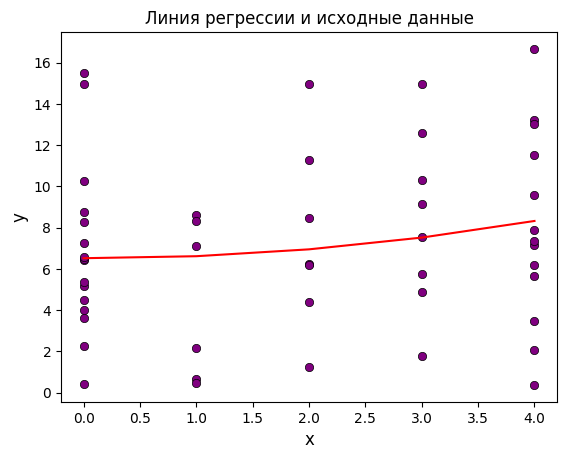

In [679]:
y =  [4.03, 8.77, 6.21, 7.15, 2.27, 2.15, 15.47,9.59, 14.94, 2.08, 5.19,14.96, 3.48, 1.80, 4.40, 
14.98, 0.65, 7.57, 6.23, 6.20, 7.88, 10.26, 7.33, 13.21, 4.49, 8.63, 11.26, 11.50, 6.41, 4.86, 6.46, 0.42, 8.48,
 8.33, 0.38, 5.64, 16.66, 13.00, 5.38, 5.76, 7.10, 0.48, 10.29, 8.28, 9.15, 6.57, 7.25, 12.58, 3.61, 1.25]

x =  [0, 0, 4, 4, 0, 1, 0, 4, 0, 4, 0, 3, 4, 3, 2, 2, 1, 3, 2, 2, 4, 0, 4, 4, 0,
 1, 2, 4, 0, 3, 0, 0, 2, 1, 4, 4, 4, 4, 0, 3, 1, 1, 3, 0, 3, 0, 0, 3, 0, 2]

b = [beta_0, beta_1, beta_2]
plt.title('Линия регрессии и исходные данные')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.scatter(x, y, color='purple', edgecolors='black', linewidths=0.5)

X_val = np.array(sorted(x))
X = np.array([[1] * 50, X_val, X_val**2])

plt.plot(X_val, np.dot(np.transpose(X), b), 'r')
plt.show()

### 6.Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

Несмещённая оценка дисперсии:

$ \displaystyle S^2 = \frac{RSS( \hat{\beta} )}{ n - r } = \frac{(Y - X^T \hat{\beta})^T (Y - X^T \hat{\beta})}{47} \approx 18.67$



In [680]:
var = np.linalg.norm((Y_matrix - X_matrix.T * Beta_matrix).T*(Y_matrix - X_matrix.T * Beta_matrix)) /(len(x) - np.linalg.matrix_rank(X_matrix))
print("ранг матрицы =",np.linalg.matrix_rank(X_matrix))
print("Несмещённая оценка дисперсии =", var)

ранг матрицы = 3
Несмещённая оценка дисперсии = 18.673351113862253


[[-7.9440407]] [[8.95044145]]


C:\Users\User\AppData\Local\Temp\ipykernel_3436\2635167241.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(mistakes, bins=np.arange(min(mistakes), max(mistakes) + h, h), edgecolor='black',color = "purple")


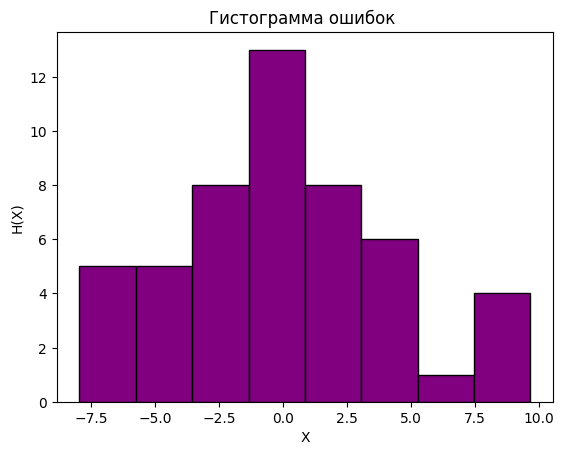

In [681]:
mistakes = Y_matrix - X_matrix.T * Beta_matrix
mean_mistakes = 0
std_mistakes = np.sqrt(var)
mistakes = Y_matrix - X_matrix.T * Beta_matrix

h = 2.20
plt.hist(mistakes, bins=np.arange(min(mistakes), max(mistakes) + h, h), edgecolor='black',color = "purple")
print(min(mistakes), max(mistakes))
plt.xlabel('X')
plt.ylabel('H(X)')
plt.title("Гистограмма ошибок ")
plt.show()



**Оценю соответсвует ли распределение ошибок нормальному распределению**

При $ a_0 = 0 $ и $ \ S^2 = 18.67$ и $ \alpha_1 = 0.05 $

$I_{1}=\left(-\infty, -5.7 \right], n_{1}=5$  $\quad\quad\quad\quad\quad\quad\quad\quad\quad$ $I_{5}=\left(0.9, 3.1\right], n_{5}=8$

$P_{1}=0.09$  $\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$  $P_{5}=0.18$  

$I_{2}=\left(-5.7, -3.5 \right], n_{2}=5$ $\quad\quad\quad\quad\quad\quad\quad$            $I_{6}=\left(3.1, 5.3\right], n_{6}=6$  

$P_{2}=0.12$   $\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$ $P_{6}=0.13$  

$I_{3}=\left(-3.5,-1.3 \right], n_{3}=8$  $\quad\quad\quad\quad\quad\quad\quad\quad\quad$ $I_{7}=\left(5.3, +\infty\right], n_{5}=5$


$P_{3}=0.17$   $\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$ $P_{7}=0.11$  

$I_{4}=\left(-1.3,0.9 \right], n_{4}=13$  

$P_{4}=0.2$  


 **Вычисление статистики критерия $\chi^2$:**

   $\chi^2 = \sum \limits_{i=1}^7 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 1.23$

   **Сравнение с критическим значением:**
   - Из таблицы для распределения $\chi^2$ с 7 степенями свободы при уровне значимости $\alpha = 0.05$ значение критерия составляет $\chi_{7, 0.95}^2 \approx 15.5$.
   - Так как $\chi_{7, 0.95}^2 > \chi^2 $, то нет оснований отвергать гипотезу
   - Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется $0.985$

In [682]:
from re import match
from math import inf
from scipy.stats import chi2
I = [(-inf, -5.7), (-5.7,-3.5), (-3.5,-1.3), (-1.3, 0.9),(0.9, 3.1),(3.1, 5.3),(5.3,+inf)]
a0=0
sigma0=18.67
n=len(y)

alpha = 0.05
n_i = [5,5,8,13,8,6,5];p_i = [];np_i = [];n_i_np_i = [];res = []
for i in I:
 p_i.append(round(sc.norm.cdf(i[1], loc=a0,scale=sigma0**0.5) - sc.norm.cdf(i[0], loc=a0,scale=sigma0**0.5), 7))
print(p_i)
for i in range (7):
 np_i.append(round(n*p_i[i],8))
print(np_i)
for i in range(7):
 n_i_np_i.append(round(n_i[i] - np_i[i], 8))
for i in range(7):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 8))
print(res, sum(res))
chi2_val = chi2.ppf(1-0.01,5)
print('chi2_val',chi2_val_5_09)
chi2 = 1.23
print("Наибольшее значение уровня значимости =", round(1 - sps.chi2.cdf(chi2, 6), 3))

[0.0935552, 0.1154091, 0.1727946, 0.2007402, 0.1809516, 0.1265632, 0.1099861]
[4.67776, 5.770455, 8.63973, 10.03701, 9.04758, 6.32816, 5.499305]
[0.02219836, 0.102869, 0.0473689, 0.87469373, 0.12129474, 0.01701742, 0.045334] 1.2307761499999998
chi2_val 15.507313055865453
Наибольшее значение уровня значимости = 0.975


In [683]:
Dn = sps.kstest([element[0,0] for element in mistakes], "norm", args = (mean_mistakes,std_mistakes)).statistic
print("Статистика критерия Колмогорова Dn:", Dn)
x_a = sps.ksone.ppf(0.95, 50)
print(x_a)
print("Наибольшее значение уровня значимости =", 1 - sps.ksone.cdf(Dn, 50))

Статистика критерия Колмогорова Dn: 0.0752626288773739
0.16959440647022855
Наибольшее значение уровня значимости = 0.5407579231909766


Критерий Колмогорова\
$\widehat{\varphi(\vec{X})} = \begin{cases} 0, \quad \widehat{D_n} \leq 0.17 \\ 1, \quad \widehat{D_n} > 0.17 \end{cases}$


Т.к. $\widehat{D_n} < x_\alpha$, то нет оснований отвергать гипотезу

   Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется $0.540$

[[-7.9440407]] [[8.95044145]]


C:\Users\User\AppData\Local\Temp\ipykernel_3436\2362336619.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(mistakes, bins=np.arange(min(mistakes), max(mistakes) + h, h), edgecolor='black',color = "purple",density= True)


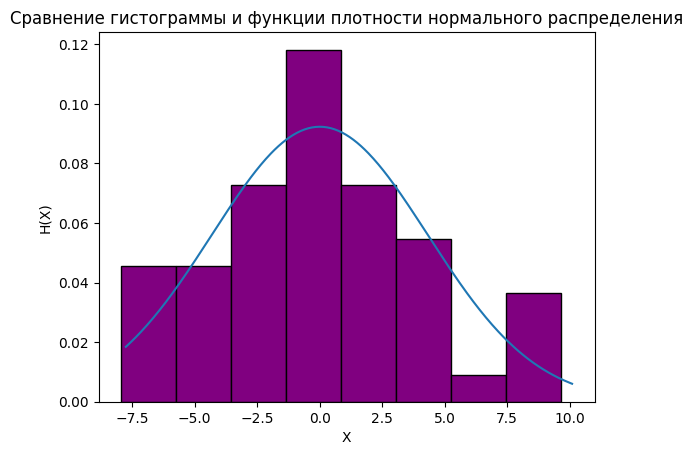

In [684]:

plt.plot(mistakes_range, sps.norm.pdf(mistakes_range, mean_mistakes, std_mistakes))
plt.hist(mistakes, bins=np.arange(min(mistakes), max(mistakes) + h, h), edgecolor='black',color = "purple",density= True)
print(min(mistakes), max(mistakes))
plt.xlabel('X')
plt.ylabel('H(X)')
plt.title("Сравнение гистограммы и функции плотности нормального распределения")
plt.show()

### 7.В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0,\beta_1,\beta_2$ уровня доверия $1-\alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1-\alpha$.

ДНО функция: $\psi = C^T \beta $

Элемент дисперсии оценки: $ b_\psi = C^T (XX^T)^{-1}C$

Тогда: $ \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r} $

Доверительный интервал уровня доверия $1 - \alpha$:

$ P_\theta(-x_\alpha \le \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \le x_\alpha) = 1 -\alpha $


$[ \widehat \psi -x_{\alpha}s\sqrt{b} , \widehat \psi + x_{\alpha}s\sqrt{b}] \ni \psi$ 

где квантиль $ x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2} $

$x_{\alpha} = S_{n - 3}(1 - \frac{\alpha}{2}) = 2.01$

- **Вычислим $\beta_0:$**

  $\psi_{\beta_0} = \begin{pmatrix}
    1 \\
    0 \\
    0
    \end{pmatrix}  ^ {\intercal} \cdot  \begin{pmatrix}
    \beta_0 \\
    \beta_1 \\
    \beta_2
    \end{pmatrix}$

    $b_{\psi_{\beta_0}} =  \begin{pmatrix}
    1 & 0 & 0
    \end{pmatrix} (XX^{\intercal})^{-1} \begin{pmatrix}
    1 \\ 0 \\ 0
    \end{pmatrix} = 0.06$

    
  
- **Вычислим $\beta_1:$**

  $\psi_{\beta_1} = \begin{pmatrix}
    0 \\
    1 \\
    0
    \end{pmatrix}  ^ {\intercal} \cdot  \begin{pmatrix}
    \beta_0 \\
    \beta_1 \\
    \beta_2
    \end{pmatrix}$
  
    $b_{\psi_{\beta_1}} =  \begin{pmatrix}
    0 & 1 & 0
    \end{pmatrix} (XX^{\intercal})^{-1} \begin{pmatrix}
    0 \\ 1 \\ 0
    \end{pmatrix} = 0.12$

- **Вычислим $\beta_2:$**

  $\psi_{\beta_2} = \begin{pmatrix}
    0 \\
    0 \\
    1
    \end{pmatrix}  ^ {\intercal} \cdot  \begin{pmatrix}
    \beta_0 \\
    \beta_1 \\
    \beta_2
    \end{pmatrix}$
  
    $b_{\psi_{\beta_2}} =  \begin{pmatrix}
    0 & 0 & 1
    \end{pmatrix} (XX^{\intercal})^{-1} \begin{pmatrix}
    0 \\ 0 \\ 1
    \end{pmatrix} = 0.07$

    
$ \cfrac{\widehat \psi - \psi}{s\sqrt{b_{\psi_{\beta_0}}}} \sim S_{n-3} $

$ \cfrac{\widehat \psi - \psi}{s\sqrt{b_{\psi_{\beta_1}}}} \sim S_{n-3} $

$ \cfrac{\widehat \psi - \psi}{s\sqrt{b_{\psi_{\beta_2}}}} \sim S_{n-3} $




In [685]:
alpha = 0.05
x_alpha = stats.t(n - 3).ppf(1 - alpha / 2)
print(f'x_alpha: {round(x_alpha, 4)}')


e0 = np.array([1, 0, 0])
e0_1 = np.array([[1], [0], [0]])
e1 = np.array([0, 1, 0])
e1_1 = np.array([[0], [1], [0]])
e2 = np.array([0, 0, 1])
e2_1 = np.array([[0], [0], [1]])

b1 = e0*XX_T_inv*e0_1
b2 = e1*XX_T_inv*e1_1
b3 = e2*XX_T_inv*e2_1

left = beta_0 - x_alpha * np.sqrt(var) * np.sqrt(b1)
right = beta_0 + x_alpha * np.sqrt(var) * np.sqrt(b1)
print("Интервал для b0 (",left,right,")")

left = beta_1 - x_alpha * np.sqrt(var) * np.sqrt(b2)
right = beta_1 + x_alpha * np.sqrt(var) * np.sqrt(b2)
print("Интервал для b1 (",left,right,")")

left = beta_2 - x_alpha * np.sqrt(var) * np.sqrt(b3)
right = beta_2 + x_alpha * np.sqrt(var) * np.sqrt(b3)
print("Интервал для b2 (",left,right,")")
print(b1,b2,b3)



x_alpha: 2.0117
Интервал для b0 ( [[4.40291042]] [[8.63620668]] )
Интервал для b1 ( [[-3.00436961]] [[2.96198222]] )
Интервал для b2 ( [[-0.61937468]] [[0.8555318]] )
[[0.05928313]] [[0.1177583]] [[0.00719619]]


$\left[4.4, 8.64\right] \ni \beta_0$

$\left[-3.004, 2.962\right] \ni \beta_1$

$\left[-0.62, 0.85\right] \ni \beta_2$

**Построю доверительный эллипс для параметра $(\beta_0, \beta_1)$ уровня доверия 1 - $\alpha$**

$ A_\alpha = \{\overrightarrow{x}: (\overrightarrow{x} - \widehat \psi)^T B^{-1} (\overrightarrow{x} - \widehat \psi) \le qs^2x_\alpha\}$

$ A_\alpha = \{\overrightarrow{x}: (\overrightarrow{x} - \widehat \psi)^T (C^T (XX^T)^{-1}C)^{-1}(\overrightarrow{x} - \widehat \psi) \le qs^2x_\alpha\}$,

где $ x_\alpha = F_{q, n-r}(x_\alpha) = 1 - \alpha$

$C = \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix} $

Пусть $ \begin{pmatrix}
x\\
y
\end{pmatrix} = P(\widehat \psi - \psi)$, где P - матрица собственных векторов.

уравнение доверительного эллипсоида :

$(\widehat \psi - \psi)^T (C^T (XX^T)^{-1}C)^{-1}(\widehat \psi - \psi) = \lambda_1 x^2 + \lambda_2 y^2 + \lambda_2 z^2 \le qs^2x_\alpha$, где $\lambda_1$, $\lambda_2$ и $\lambda_3$ - собственные числа матрицы $XX^T$

$\cfrac{\lambda_1}{qs^2x_\alpha}x^2 + \cfrac{\lambda_2}{qs^2x_\alpha}y^2 + \cfrac{\lambda_2}{qs^2x_\alpha}z^2\le 1$

**Уравнение 'эллипса:**

$28.2x^2 + 0.2y^2 + 0.042z^2 < 1$

In [686]:
XX_T = np.dot(X_matrix, X_matrix.T)
eigenvalues, eigenvectors = np.linalg.eig(XX_T)
beta = [beta_0, beta_1, beta_2]


x_alpha = stats.f(3, n - 2).ppf(1 - alpha)
print(f'x_alpha: {round(x_alpha, 4)}')

a = np.sqrt((2 * var * x_alpha) / eigenvalues[0])
b = np.sqrt((2 * var * x_alpha) / eigenvalues[1])

print(f'Большая полуось: {round(a, 4)}')
print(f'Малая полуось: {round(b, 4)}')


factors = []
denominator = 3 * var * x_alpha
for lmbd in eigenvalues:
 factors.append(lmbd / denominator)

print("уравнение эллипса"f'{round(factors[0] , 4)}x^2 + {round(factors[1] , 4)}y^2 + {round(factors[2] , 4)}z^2')


x_alpha: 2.7981
Большая полуось: 0.1538
Малая полуось: 1.8386
уравнение эллипса28.2014x^2 + 0.1972y^2 + 0.0421z^2


### 8.Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной X и проверить её значимость на уровне $\alpha$.

Основная гипотеза: $H_0 : \psi = 0$

ДНО - функция: 
$\psi = C^T \beta $

$ C = \begin{pmatrix}
    0 \\
    0 \\
    1
\end{pmatrix} \Rightarrow$, $\widehat \psi = \widehat \beta_2 $

In [687]:
c = np.array([0, 0, 1])
b = np.dot(np.dot(c.T, XX_T_inv), c)

q = 1
r = 3
F = beta_2 ** 2 / (b * q * var)
print("Статистика F = " , F)

x_alpha = stats.f(q, 47).ppf(1 - alpha)
print("x_alpha = " , x_alpha)

F = 1.11
print("p_value", round(1 - sps.f.cdf(F, 1, 47), 3))

Статистика F =  [[0.10375691]]
x_alpha =  4.0470998945817005
p_value 0.297


$\mathbb{F} \approx 0.104$

$x_{\alpha} \approx 4.05$

$\mathbb{F} < x_{\alpha_2} $  , а значит нет оснований отвергнуть гипотезу

## Выводы

В ходе выполнения практической работы быыла сформулирована линейная регрессивная модель переменной Y по переменной X. Была построена и интерпретирована несмещённая оценка дисперсии, оценено расстрояние до нормального распределения по Колмогорову. Так же в практической работе были получены навыки построения доверительных эллипсов и сформулированы гипотезы линейной регрессионной зависимости переменной Y от переменной X.